In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

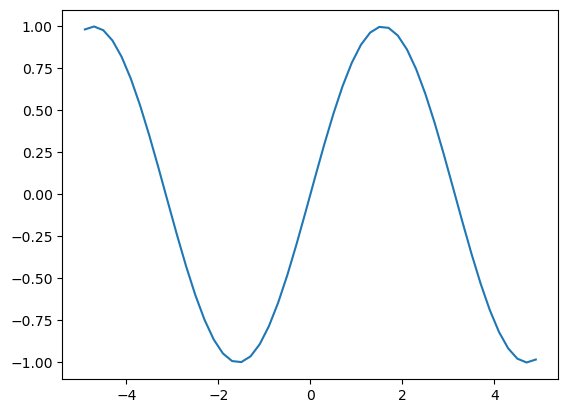

In [2]:
# -4.9から4.9までの50要素の等差数列(0.2間隔)
x_sin = np.linspace(-4.9, 4.9)
y_sin = np.sin(x_sin)
plt.plot(x_sin, y_sin)
plt.show()

In [3]:
NUM_RNN = 10  # 1時系列のデータ数
NUM_DATA = len(x_sin) - NUM_RNN # 今回は40(=50-10)
x = []
y = []

for i in range(NUM_DATA):
    x.append(y_sin[i:i+NUM_RNN])      # 説明変数
    y.append(y_sin[i+1:i+NUM_RNN+1])  # 正解データなので1ずらした値

else:
    x_train = np.array(x).reshape(NUM_DATA, NUM_RNN, 1) # 入力を(サンプル数、時系列の数、入力層のニューロン数)にする
    y_train = np.array(y).reshape(NUM_DATA, NUM_RNN, 1) # 説明変数(x_train)と同様のshape

In [4]:
NUM_DIM = 8  # 中間層の次元数

model = Sequential()

# return_sequenceがTrueなので全RNN層が出力を返す(Falseだと最後のRNN層のみが出力を返す)
model.add(SimpleRNN(NUM_DIM, input_shape=(NUM_RNN, 1), return_sequences=True))
model.add(Dense(1, activation="linear"))  #全結合層
model.compile(loss="mean_squared_error", optimizer="sgd")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 8)             80        
                                                                 
 dense (Dense)               (None, 10, 1)             9         
                                                                 
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
5/5 [==============================] - 2s 3ms/step - loss: 0.5568
Epoch 2/20
5/5 [==============================] - 0s 3ms/step - loss: 0.4390
Epoch 3/20
5/5 [==============================] - 0s 3ms/step - loss: 0.3535
Epoch 4/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2910
Epoch 5/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2428
Epoch 6/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2071
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1798
Epoch 8/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1577
Epoch 9/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1402
Epoch 10/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1261
Epoch 11/20
5/5 [==============================] - 0s 11ms/step - loss: 0.1148
Epoch 12/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1045
Epoch 13/20
5/5 [==============================] - 0s 2ms/step - loss: 0

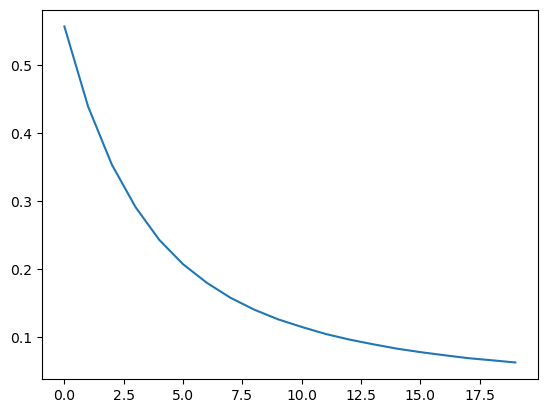

In [5]:
history = model.fit(x_train, y_train, epochs=20, batch_size=8)

# Lossをグラフ表示
loss = history.history['loss']
plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から19)
plt.show()

In [6]:
# x[0]は最初の入力(時系列10個の数)。reshape(-1)で一次元のベクトルにする。
x_test = x_train[0].reshape(-1)

1/1 [==============================] - 0s 25ms/step


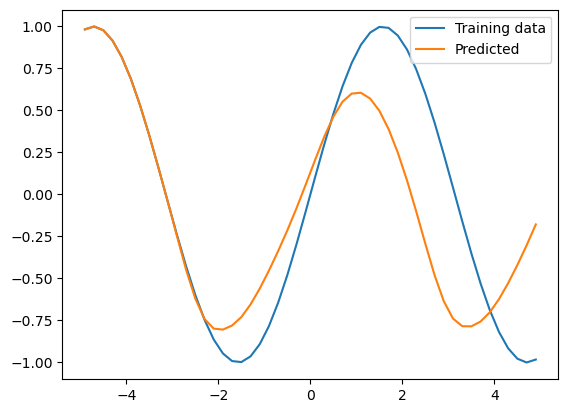

In [7]:
# データ数(40回)ループ
for i in range(NUM_DATA):
    y_pred = model.predict(x_test[-NUM_RNN:].reshape(1, NUM_RNN, 1))  # 直近データ(最後から10要素)を使って予測
    x_test = np.append(x_test, y_pred[0][NUM_RNN-1][0])  # 出力結果をx_testに追加(n_rnn-1が10番目を意味している)

# 最初の10要素は完全に同じ
plt.plot(x_sin, y_sin, label="Training data")
plt.plot(x_sin, x_test, label="Predicted")
plt.legend()
plt.show()